In [1]:
import echopype as ep

In [2]:
ed = ep.open_raw("/Users/wu-jung/Downloads/EX2201_EK60-D20220226-T064314.raw", sonar_model="EK80")

In [3]:
ed

<EchoData: standardized raw data from Internal Memory>
Top-level: contains metadata about the SONAR-netCDF4 file format.
├── Environment: contains information relevant to acoustic propagation through water.
├── Platform: contains information about the platform on which the sonar is installed.
│   └── NMEA: contains information specific to the NMEA protocol.
├── Provenance: contains metadata about how the SONAR-netCDF4 version of the data were obtained.
├── Sonar: contains sonar system metadata and sonar beam groups.
│   └── Beam_group1: contains backscatter data (either complex samples or uncalibrated power samples) and other beam or channel-specific data, including split-beam angle data when they exist.
└── Vendor_specific: contains vendor-specific information about the sonar and the data.

In [21]:
import matplotlib.pyplot as plt

In [36]:
ed["Sonar/Beam_group1"]["channel"]

<xarray.DataArray 'channel' (channel: 5)>
array(['GPT 009072033ffa-1 ES120-7C_ES', 'GPT 009072034253-1 ES200-7C_ES',
       'GPT 009072066c0e-1 ES18_ES', 'WBT 746998-15 ES70-7C_ES',
       'WBT 748247-15 ES38-7_ES'], dtype='<U30')
Coordinates:
  * channel  (channel) <U30 'GPT 009072033ffa-1 ES120-7C_ES' ... 'WBT 748247-...
Attributes:
    long_name:  Vendor channel ID

In [30]:
ed["Sonar/Beam_group1"]["sample_interval"].squeeze().isel(ping_time=10)

<xarray.DataArray 'sample_interval' (channel: 5)>
array([6.40e-05, 6.40e-05, 5.12e-04, 2.40e-05, 4.80e-05])
Coordinates:
  * channel    (channel) <U30 'GPT 009072033ffa-1 ES120-7C_ES' ... 'WBT 74824...
    ping_time  datetime64[ns] 2022-02-26T06:44:09.488999936
Attributes:
    long_name:  Interval between recorded raw data samples
    units:      s
    valid_min:  0.0

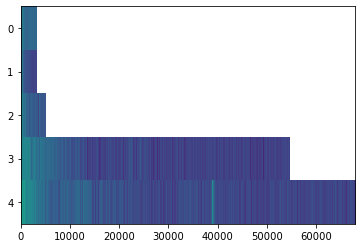

In [31]:
plt.imshow(
    ed["Sonar/Beam_group1"]["backscatter_r"].squeeze().isel(ping_time=10).values,
    aspect="auto",
    interpolation="none"
)

In [40]:
range_len = ed["Sonar/Beam_group1"]["backscatter_r"].squeeze().isel(ping_time=10).values.squeeze()
range_len

array([[   8.27832508,   21.47190475,   11.07696342, ...,           nan,
                  nan,           nan],
       [   7.84324217,   15.21612549,   15.2514019 , ...,           nan,
                  nan,           nan],
       [  17.95596886,   25.58754921,   25.50523567, ...,           nan,
                  nan,           nan],
       [  12.22934341,   17.63847542,   20.78988457, ...,           nan,
                  nan,           nan],
       [  13.52283192,   19.60222626,   23.43565559, ..., -141.62519836,
        -141.44882202, -141.08428955]])

In [42]:
import numpy as np

In [48]:
# Number of non-NA range samples
range_len = ed["Sonar/Beam_group1"]["backscatter_r"].squeeze().isel(ping_time=10).values.squeeze()
actual_range_sample = [(~np.isnan(rr)).sum() for rr in range_len]
actual_range_sample

[3154, 3154, 5100, 54550, 67983]

In [49]:
# Sample inverval for each channel at the same ping
# (although this did not change actually consistent over all ping_times)
sample_interval = ed["Sonar/Beam_group1"]["sample_interval"].squeeze().isel(ping_time=10).values
sample_interval

array([6.40e-05, 6.40e-05, 5.12e-04, 2.40e-05, 4.80e-05])

In [50]:
# Collected data range [m]
actual_range_sample * sample_interval * 1500 /2  # assume sound speed 1500 m/s

array([ 151.392,  151.392, 1958.4  ,  981.9  , 2447.388])

In [33]:
5000 * 5.12e-4 *1500/2

1920.0

In [34]:
3500 * 6.4e-5 *1500/2

167.99999999999997

In [37]:
54550 * 2.4e-5 * 1500 /2

981.9000000000001

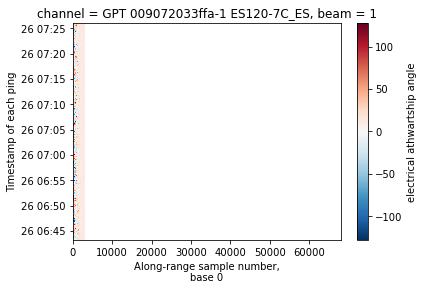

In [8]:
ed["Sonar/Beam_group1"]["angle_athwartship"].squeeze().isel(channel=0).plot()

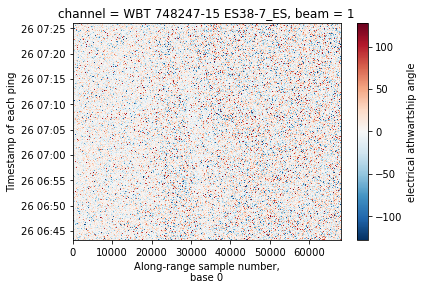

In [9]:
ed["Sonar/Beam_group1"]["angle_athwartship"].squeeze().isel(channel=4).plot()

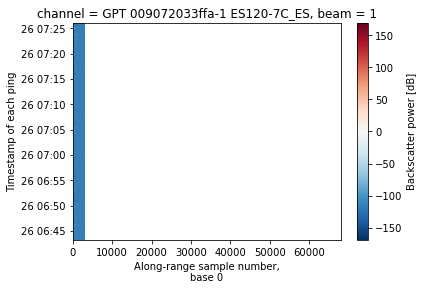

In [10]:
ed["Sonar/Beam_group1"]["backscatter_r"].squeeze().isel(channel=0).plot()

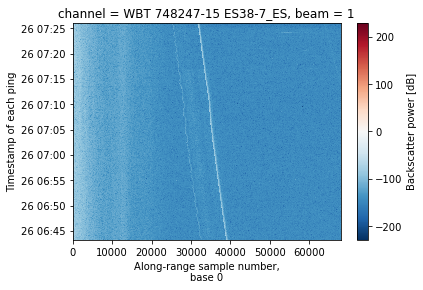

In [13]:
ed["Sonar/Beam_group1"]["backscatter_r"].squeeze().isel(channel=4).plot()

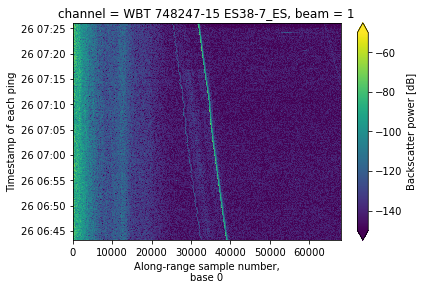

In [52]:
ed["Sonar/Beam_group1"]["backscatter_r"].squeeze().isel(channel=4).plot(vmax=-50, vmin=-150)

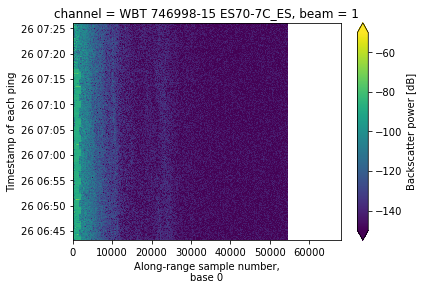

In [53]:
ed["Sonar/Beam_group1"]["backscatter_r"].squeeze().isel(channel=3).plot(vmax=-50, vmin=-150)

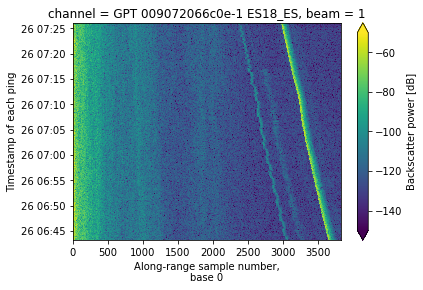

In [56]:
ed["Sonar/Beam_group1"]["backscatter_r"].squeeze().isel(channel=2).dropna("range_sample").plot(vmax=-50, vmin=-150)

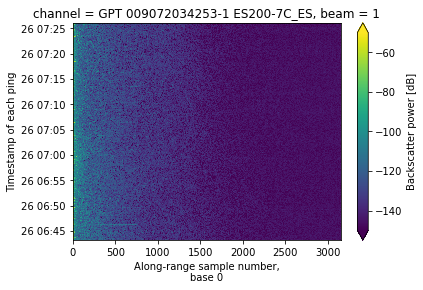

In [57]:
ed["Sonar/Beam_group1"]["backscatter_r"].squeeze().isel(channel=1).dropna("range_sample").plot(vmax=-50, vmin=-150)

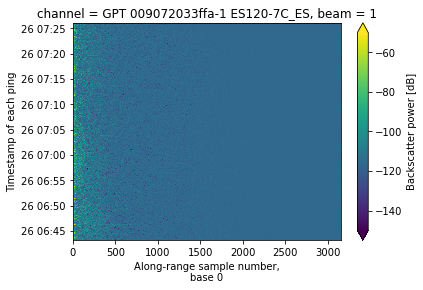

In [58]:
ed["Sonar/Beam_group1"]["backscatter_r"].squeeze().isel(channel=0).dropna("range_sample").plot(vmax=-50, vmin=-150)

In [4]:
ed.to_zarr("/Users/wu-jung/Downloads/EX2201_EK60-D20220226-T064314.zarr")